#  **The Sparks Foundation**

## **Data Science And Business Analytics Internship (GRIP July21)**

# **Author: Sagar Gaikwad**

#### Problem Statement: From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.


In [65]:
#Importing required Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [66]:
#Importing dataset

iris_df = pd.read_csv(r'Iris.csv',header=0)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Clusters
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1


In [67]:
#Dropping not required variable

iris_df =iris_df.drop(['Id'],axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Clusters
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1


### Exploratory Analysis

In [68]:
print (iris_df.dtypes)

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


In [69]:
print (iris_df.shape)

(150, 5)


In [70]:
print (iris_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [71]:
print (iris_df.describe(include="all"))

        SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
count      150.000000    150.000000     150.000000    150.000000   
unique            NaN           NaN            NaN           NaN   
top               NaN           NaN            NaN           NaN   
freq              NaN           NaN            NaN           NaN   
mean         5.843333      3.054000       3.758667      1.198667   
std          0.828066      0.433594       1.764420      0.763161   
min          4.300000      2.000000       1.000000      0.100000   
25%          5.100000      2.800000       1.600000      0.300000   
50%          5.800000      3.000000       4.350000      1.300000   
75%          6.400000      3.300000       5.100000      1.800000   
max          7.900000      4.400000       6.900000      2.500000   

               Species  
count              150  
unique               3  
top     Iris-virginica  
freq                50  
mean               NaN  
std                NaN  
min     

In [72]:
#Checking missing values in dataset

iris_df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Find Optimum numbers of clusters.

In [73]:
#Creating array of x for processing

x= iris_df.values[:,:-1]
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3.0, 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5.0, 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5.0, 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3.0, 1.4, 0.1],
       [4.3, 3.0, 1.1, 0.1],
       [5.8, 4.0, 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1.0, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5.0, 3.0, 1.6, 0.2],
       [5.0, 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

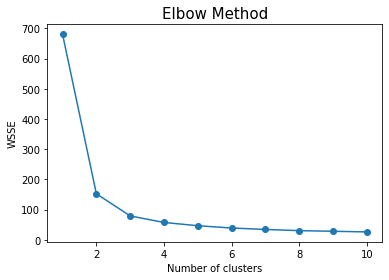

In [74]:
## Using the elbow method to find the optimal number of clusters

from sklearn.cluster import KMeans
wsse = []

for i in range(1,11):
    kmeans=KMeans(n_clusters=i, random_state=10)
    kmeans.fit(x)
    wsse.append(kmeans.inertia_)
    
#plotting of number clusters
plt.plot(range(1,11),wsse)
plt.scatter(range(1,11),wsse)
plt.title('Elbow Method', size=15)
plt.xlabel('Number of clusters')
plt.ylabel('WSSE')
plt.show()

#### **Observation:- In above method curve gets bend at 3 & remains constant,as seen little changes in WSSE values.Larger changes at point 3 compare to lower number of clusters**.
#### **So selecting 3 as number of clusters for the module.**

In [75]:
print(wsse)

[680.8243999999996, 152.36870647733915, 78.94084142614601, 57.317873214285726, 46.535582051282034, 38.93873974358975, 34.19846461871464, 30.236524046129325, 28.11553453563981, 25.996554473304478]


In [76]:
#Fitting K-Means to the dataset
kmeans = KMeans(n_clusters=3,random_state=10)
Y_pred = kmeans.fit_predict(x)



In [77]:
Y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [91]:
#Creating new variable in dataframe to store predicted values

iris_df["Clusters"]=Y_pred
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Clusters
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1


In [88]:
#Mapping predicted results with name of species given in the dataset.

iris_df.Clusters=iris_df.Clusters.map({0:"Iris-versicolour",1:"Iris-setosa",2:"Iris-virginica"})
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Clusters
0,5.1,3.5,1.4,0.2,Iris-setosa,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa,Iris-setosa


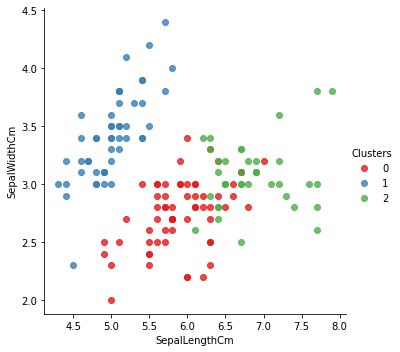

In [92]:
#Scatter plot

sns.lmplot(data=iris_df,x="SepalLengthCm" , y="SepalWidthCm",
          fit_reg=False,hue='Clusters',palette="Set1")
plt.show()